In [1]:
import matplotlib.pyplot as plt 
from matplotlib.animation import FuncAnimation, FFMpegWriter 
import plots 
plots.mpltoolkit.load_mpl_presets() 
import numpy as np 
import vice 
import sys 
sys.path.append("..") 
import src 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0rc1-py3.7-macosx-10.9-x86_64.egg/vice/__init__.py:147: UserWarning: Using a pre-release of VICE
  UserWarning)


T = 13.21 Gyr
T = 13.21 Gyr


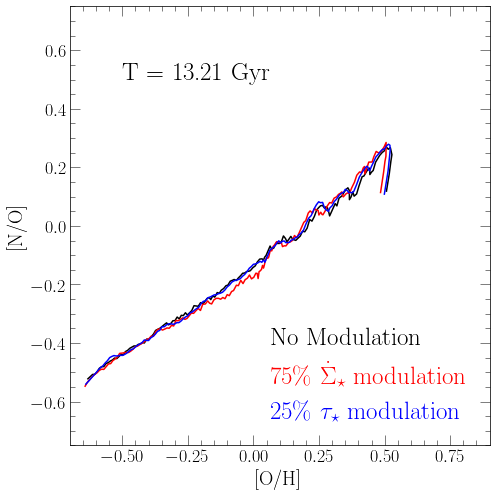

In [4]:
fig = plt.figure(figsize = (7, 7), facecolor = "white") 
ax = fig.add_subplot(111) 
ax.set_xlabel("[O/H]") 
ax.set_ylabel("[N/O]") 
ax.set_xlim([-0.7, 0.9]) 
ax.set_ylim([-0.75, 0.75]) 
ax.set_yticks([-0.6 + 0.2 * _ for _ in range(7)]) 
colors = {
#     "insideout": "black", 
    "insideout": "black", 
    "lateburst": "red", 
    "outerburst": "blue", 
    "modulated": "red", 
    "modsfe": "blue" 
} 
insideout_line = ax.plot([], [], label = "No Modulation", 
    c = plots.mpltoolkit.named_colors()[colors["insideout"]])[0] 
# lateburst_line = ax.plot([], [], label = "Late-Burst", c = plots.mpltoolkit.named_colors()[colors["lateburst"]])[0] 
# outerburst_line = ax.plot([], [], label = "Outer-Burst", c = plots.mpltoolkit.named_colors()[colors["outerburst"]])[0] 
modulated_line = ax.plot([], [], label = r"75\% $\dot{\Sigma}_\star$ modulation", 
    c = plots.mpltoolkit.named_colors()[colors["modulated"]])[0] 
modsfe_line = ax.plot([], [], label = r"25\% $\tau_\star$ modulation", 
    c = plots.mpltoolkit.named_colors()[colors["modsfe"]])[0] 
plt.tight_layout() 
timestamp = ax.text(-0.5, 0.5, "T = 0.00 Gyr", fontsize = 25) 
# insideout = vice.output("../outputs/diffusion/insideout") 
# lateburst = vice.output("../outputs/diffusion/lateburst") 
# outerburst = vice.output("../outputs/diffusion/outerburst") 
# modulated = vice.output("../outputs/diffusion/modulated") 
# modsfe = vice.output("../outputs/diffusion/modulated_sfe")
insideout = vice.output("../outputs/diffusion/constifr")
modulated = vice.output("../outputs/diffusion/ifroscil_75")
modsfe = vice.output("../outputs/diffusion/SFEoscil")
# insideout = vice.output("../outputs/post-process/constifr")
# modulated = vice.output("../outputs/post-process/ifroscil_75")
# modsfe = vice.output("../outputs/post-process/SFEoscil_75")

zones = ["zone%d" % (_) for _ in range(155)] 
leg = ax.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    fontsize = 25, handlelength = 0) 
for i in range(3): 
# for i in range(2): 
    leg.get_texts()[i].set_color(["black", "red", "blue"][i]) 
#     leg.get_texts()[i].set_color(["red", "blue"][i]) 
    leg.legendHandles[i].set_visible(False) 

def init(): 
#     return [insideout_line, lateburst_line, outerburst_line] 
    return [insideout_line, modulated_line, modsfe_line] 

def update(frame): 
#     time = "T = %.2f Gyr" % (insideout.zones["zone0"].history["time"][frame]) 
    time = "T = %.2f Gyr" % (modulated.zones["zone0"].history["time"][frame])
    try:
        io_frame = insideout.zones["zone0"].history["time"].index(modulated.zones["zone0"].history["time"][frame])
    except:
        return [insideout_line, modulated_line, modsfe_line]
    sys.stdout.write("\r%s" % (time)) 
    sys.stdout.flush() 
    timestamp.set_text(time) 
    insideout_xvals = [insideout.zones[_].history["[o/h]"][io_frame] for _ in zones] 
    insideout_yvals = [insideout.zones[_].history["[n/o]"][io_frame] for _ in zones] 
#     lateburst_xvals = [lateburst.zones[_].history["[o/h]"][frame] for _ in zones] 
#     lateburst_yvals = [lateburst.zones[_].history["[n/o]"][frame] for _ in zones] 
#     outerburst_xvals = [outerburst.zones[_].history["[o/h]"][frame] for _ in zones] 
#     outerburst_yvals = [outerburst.zones[_].history["[n/o]"][frame] for _ in zones] 
    modulated_xvals = [modulated.zones[_].history["[o/h]"][frame] for _ in zones] 
    modulated_yvals = [modulated.zones[_].history["[n/o]"][frame] for _ in zones] 
    try:
        modsfe_frame = modsfe.zones["zone0"].history["time"].index(modulated.zones["zone0"].history["time"][frame])
    except:
        return [insideout_line, modulated_line, modsfe_line]
    modsfe_xvals = [modsfe.zones[_].history["[o/h]"][modsfe_frame] for _ in zones] 
    modsfe_yvals = [modsfe.zones[_].history["[n/o]"][modsfe_frame] for _ in zones] 
    insideout_line.set_data(insideout_xvals, insideout_yvals) 
#     lateburst_line.set_data(lateburst_xvals, lateburst_yvals) 
#     outerburst_line.set_data(outerburst_xvals, outerburst_yvals) 
    modulated_line.set_data(modulated_xvals, modulated_yvals) 
    modsfe_line.set_data(modsfe_xvals, modsfe_yvals) 
#     return [insideout_line, lateburst_line, outerburst_line] 
    return [insideout_line, modulated_line, modsfe_line]  

# ani = FuncAnimation(fig, update, frames = len(insideout.zones["zone0"].history["time"]), 
#     init_func = init, blit = True, interval = 10, repeat_delay = 1000)
ani = FuncAnimation(fig, update, frames = len(modulated.zones["zone0"].history["time"]), 
    init_func = init, blit = True, interval = 10, repeat_delay = 1000) 
writer = FFMpegWriter(fps = 100) 
for ext in ["mp4", "gif"]: 
    ani.save("no_oh_tracks_modulated_comp.%s" % (ext), writer = writer) 
    sys.stdout.write("\n") 

/Users/astrobeard/.local/lib/python3.7/site-packages/vice-1.3.0-py3.7-macosx-10.9-x86_64.egg/vice/core/outputs/output.py:131: UserWarning: agb n yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)


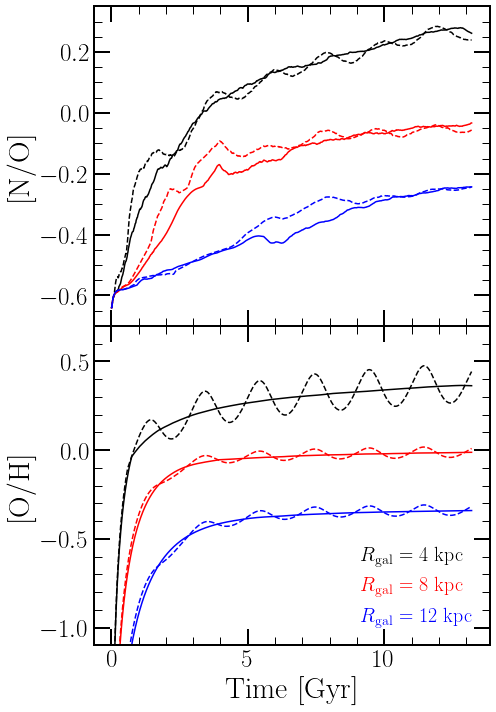

In [12]:
fig = plt.figure(figsize = (7, 10), facecolor = "white") 
ax1 = fig.add_subplot(211) 
ax2 = fig.add_subplot(212, sharex = ax1) 
ax1.set_ylabel("[N/O]") 
ax2.set_ylabel("[O/H]") 
ax2.set_xlabel("Time [Gyr]") 
ax1.set_ylim([-0.7, 0.35]) 
ax2.set_ylim([-1.1, 0.7]) 
plt.setp(ax1.get_xticklabels(), visible = False) 

insideout = vice.output("../outputs/diffusion/insideout") 
modulated = vice.output("../outputs/diffusion/modulated") 
zones = ["zone40", "zone80", "zone120"] 
labels = [r"$R_\text{gal}$ = 4 kpc", r"$R_\text{gal}$ = 8 kpc", r"$R_\text{gal}$ = 12 kpc"] 
colors = ["black", "red", "blue"] 
for i in range(3): 
    kwargs = {
        "c": plots.mpltoolkit.named_colors()[colors[i]], 
        "linestyle": '--' 
    } 
    ax1.plot(modulated.zones[zones[i]].history["time"], 
        modulated.zones[zones[i]].history["[n/o]"], **kwargs) 
    ax2.plot(modulated.zones[zones[i]].history["time"], 
        modulated.zones[zones[i]].history["[o/h]"], **kwargs) 
    kwargs["linestyle"] = '-' 
    kwargs["label"] = labels[i] 
    ax1.plot(insideout.zones[zones[i]].history["time"], 
        insideout.zones[zones[i]].history["[n/o]"], **kwargs) 
    ax2.plot(insideout.zones[zones[i]].history["time"], 
        insideout.zones[zones[i]].history["[o/h]"], **kwargs) 
    
leg = ax2.legend(loc = plots.mpltoolkit.mpl_loc("lower right"), ncol = 1, frameon = False, 
    handlelength = 0, fontsize = 20) 
for i in range(3): 
    leg.get_texts()[i].set_color(colors[i]) 
    leg.legendHandles[i].set_visible(False) 

plt.tight_layout() 
plt.subplots_adjust(hspace = 0) 